<a href="https://colab.research.google.com/github/RAks55/Retinal-OCT-Binary-Classification/blob/main/RE2tinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.layers import Dropout
import matplotlib.pyplot as plt

In [ ]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory('/content/drive/MyDrive/FinalYearProject /Train',
                                          target_size=(300,300),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory('/content/drive/MyDrive/FinalYearProject /Test',
                                          target_size=(300,300),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 2005 images belonging to 2 classes.
Found 302 images belonging to 2 classes.


In [ ]:
test_dataset.class_indices
train_dataset.class_indices

{'AMD': 0, 'Normal': 1}

In [ ]:
train_dataset.class_indices

{'AMD': 0, 'Normal': 1}

In [ ]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(300,300,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))
model.add(Dropout(0.5))

# Output layer with single neuron which gives 0 for AMD or 1 for Normal 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 128)      0

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history= model.fit_generator(train_dataset,steps_per_epoch = 50 , epochs = 70,validation_data = test_dataset )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/70
50/50 [==============================] - 349s 7s/step - loss: 0.2508 - accuracy: 0.8988 - val_loss: 0.7874 - val_accuracy: 0.7086
Epoch 2/70
50/50 [==============================] - 65s 1s/step - loss: 0.0059 - accuracy: 0.9975 - val_loss: 3.5191 - val_accuracy: 0.5000
Epoch 3/70
50/50 [==============================] - 28s 566ms/step - loss: 0.0015 - accuracy: 0.9994 - val_loss: 13.3672 - val_accuracy: 0.5000
Epoch 4/70
50/50 [==============================] - 21s 418ms/step - loss: 0.0139 - accuracy: 0.9987 - val_loss: 5.9703 - val_accuracy: 0.6325
Epoch 5/70
50/50 [==============================] - 18s 354ms/step - loss: 7.8097e-04 - accuracy: 1.0000 - val_loss: 2.8745 - val_accuracy: 0.7351
Epoch 6/70
50/50 [==============================] - 17s 342ms/step - loss: 4.2499e-04 - accuracy: 1.0000 - val_loss: 4.9687 - val_accuracy: 0.6722
Epoch 7/70
50/50 [==============================] - 17s 334ms/step - loss: 3.6638e-05 - accuracy: 1.0000 - val_loss: 6.3175 - val_accuracy

In [ ]:
model.evaluate_generator(train_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[3.5725239655448604e-08, 1.0]

In [ ]:
model.evaluate_generator(test_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.5735110640525818, 0.807947039604187]

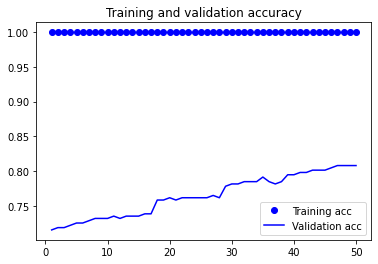

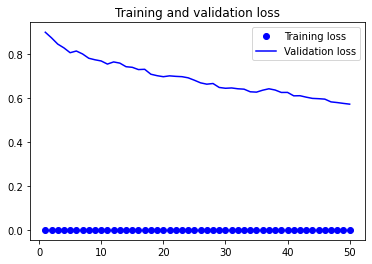

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(300,300))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("NORMAL",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("AMD",fontsize=30)

[[0.]]


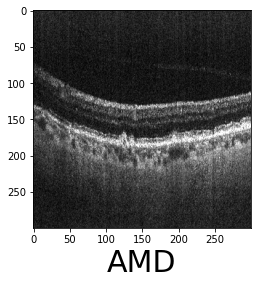

In [ ]:
predictImage('/content/drive/MyDrive/FinalYearProject /Train/AMD/INT0156.bmp')